In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_phones = 1000

data = {
    'brand': np.random.choice(['Titan', 'Nexus', 'Aura', 'Zenix'], n_phones),
    'npu_tops': np.random.randint(10, 60, n_phones),
    'ram_gb': np.random.choice([8, 12, 16, 24, 32], n_phones),
    'storage_gb': np.random.choice([256, 512, 1024], n_phones),
    'battery_mah': np.random.randint(4500, 6500, n_phones),
    'charging_watts': np.random.choice([45, 67, 100, 150, 240], n_phones),
    'screen_hz': np.random.choice([120, 144, 165], n_phones),
    'is_foldable': np.random.choice([0, 1], n_phones, p=[0.8, 0.2])
}

df = pd.DataFrame(data)

df['actual_price_usd'] = (
    (df['npu_tops'] * 12) + 
    (df['ram_gb'] * 20) + 
    (df['storage_gb'] * 0.15) + 
    (df['charging_watts'] * 1.2) +
    (df['is_foldable'] * 350) +
    np.random.normal(0, 40, n_phones)
).astype(int)

print("🚀 2026 TechScout Dataset Generated!")
df.head() 

🚀 2026 TechScout Dataset Generated!


,brand,npu_tops,ram_gb,storage_gb,battery_mah,charging_watts,screen_hz,is_foldable,actual_price_usd
0,Aura,26,32,256,5619,67,165,0,1078
1,Zenix,18,8,1024,6249,100,120,0,636
2,Titan,42,16,512,4793,240,165,0,1137
3,Aura,29,24,1024,4708,67,144,1,1425
4,Aura,22,8,512,5866,100,144,1,951


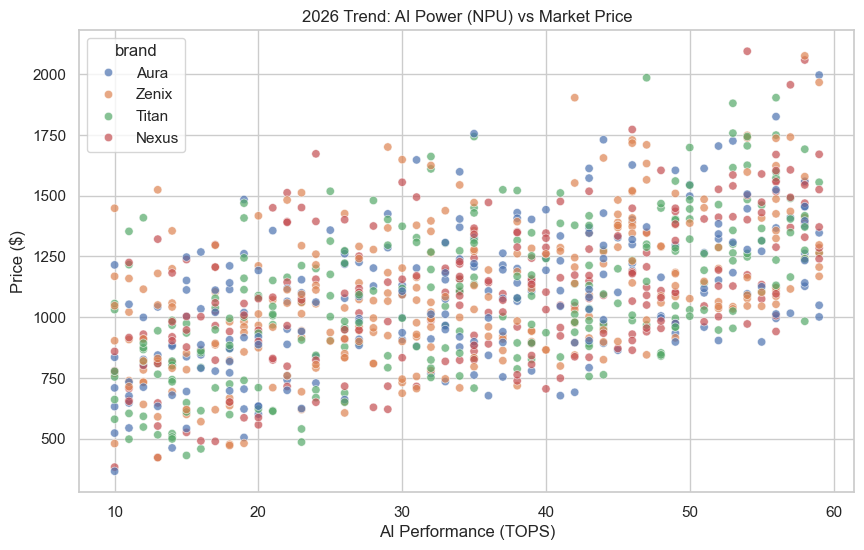

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_theme(style="whitegrid")

# Create a chart to see how NPU Power (AI) affects Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='npu_tops', y='actual_price_usd', hue='brand', alpha=0.7)
plt.title('2026 Trend: AI Power (NPU) vs Market Price')
plt.xlabel('AI Performance (TOPS)')
plt.ylabel('Price ($)')
plt.show()

In [3]:
# Select only the numeric columns for correlation
numeric_df = df.drop(columns=['brand'])

# Calculate how much each feature affects the price
correlation = numeric_df.corr()['actual_price_usd'].sort_values(ascending=False)

print("--- Price Driver Analysis ---")
print(correlation)

--- Price Driver Analysis ---
actual_price_usd    1.000000
ram_gb              0.560471
npu_tops            0.551912
is_foldable         0.473747
charging_watts      0.269113
storage_gb          0.150961
battery_mah         0.010320
screen_hz          -0.012114
Name: actual_price_usd, dtype: float64


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 1. Prepare the data (X = Features, y = Goal)
X = df.drop(columns=['actual_price_usd', 'brand'])
y = df['actual_price_usd']

# 2. Split into "Study Material" and "The Final Exam"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Choose the Algorithm (The Brain Type)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 4. Train the Brain (The machine is now looking for patterns)
model.fit(X_train, y_train)

# 5. Check the accuracy
predictions = model.predict(X_test)
error = mean_absolute_error(y_test, predictions)

print(f"✅ Training Complete!")
print(f"💰 Average Prediction Error: ${error:.2f}")

✅ Training Complete!
💰 Average Prediction Error: $51.33


In [5]:
import xgboost as xgb
from sklearn.metrics import r2_score

# 1. Use the powerful XGBoost Regressor
# This is what real-world data scientists use for tabular data
smart_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
smart_model.fit(X_train, y_train)

# 2. Make predictions on our test set
y_pred = smart_model.predict(X_test)

# 3. Calculate the R² Score (How much of the market does our AI "understand"?)
# 1.0 is perfect understanding. 
r2 = r2_score(y_test, y_pred)

print(f"🧠 Intelligence Level: {r2*100:.1f}%")
print("✅ Your Market Intelligence Agent is trained.")

🧠 Intelligence Level: 96.8%
✅ Your Market Intelligence Agent is trained.


In [7]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function that uses your AI to predict
def get_prediction(npu, ram, storage, battery, charging, screen, foldable):
    # Prepare the input for the model
    # Order must match exactly: npu_tops, ram_gb, storage_gb, battery_mah, charging_watts, screen_hz, is_foldable
    input_data = pd.DataFrame([[npu, ram, storage, battery, charging, screen, foldable]], 
                              columns=X.columns)
    
    price = smart_model.predict(input_data)[0]
    
    with output_area:
        clear_output()
        print(f"--- 📱 TechScout v2.0 AI Report ---")
        print(f"🤖 Predicted Market Price: ${price:,.2f}")
        
        # Add the 'Value Hunter' Logic
        if price > 1200:
            print("🚀 STATUS: Ultra-Flagship Territory")
        elif price < 600:
            print("💰 STATUS: Budget King Candidate")
        else:
            print("📱 STATUS: Mid-Range Standard")

# Create the UI Elements
style = {'description_width': 'initial'}
npu_slider = widgets.IntSlider(value=30, min=10, max=60, description='NPU Power (TOPS):', style=style)
ram_dropdown = widgets.Dropdown(options=[8, 12, 16, 24, 32], value=12, description='RAM (GB):', style=style)
storage_dropdown = widgets.Dropdown(options=[256, 512, 1024], value=256, description='Storage (GB):', style=style)
battery_slider = widgets.IntSlider(value=5000, min=4000, max=7000, step=100, description='Battery (mAh):', style=style)
charging_slider = widgets.SelectionSlider(options=[45, 67, 100, 150, 240], value=67, description='Charging (W):', style=style)
screen_slider = widgets.SelectionSlider(options=[120, 144, 165], value=120, description='Screen (Hz):', style=style)
foldable_toggle = widgets.ToggleButton(value=False, description='Foldable?', button_style='info')

predict_button = widgets.Button(description="Calculate Market Price", button_style='success')
output_area = widgets.Output()

# Link the button to the function
def on_button_clicked(b):
    get_prediction(npu_slider.value, ram_dropdown.value, storage_dropdown.value, 
                   battery_slider.value, charging_slider.value, 
                   screen_slider.value, int(foldable_toggle.value))

predict_button.on_click(on_button_clicked)

# Display the Dashboard
print("🛠️ ENTER PROTOTYPE SPECS:")
ui = widgets.VBox([npu_slider, ram_dropdown, storage_dropdown, battery_slider, charging_slider, screen_slider, foldable_toggle, predict_button])
display(ui, output_area)

🛠️ ENTER PROTOTYPE SPECS:


Output()